## Testing Alpha Advantage

#### Importing libraries

In [24]:
from alpha_vantage.timeseries import TimeSeries
from alpha_vantage.techindicators import TechIndicators
from pprint import pprint
import matplotlib.pyplot as plt

### Fetching data from company and printing

In [10]:
API_KEY = 'Insert api key here'
ts = TimeSeries(key=API_KEY)
# Get json object with the intraday data and another with  the call's metadata
data, meta_data = ts.get_intraday('GOOGL')
ts = TimeSeries(key=API_KEY, output_format='pandas')

In [22]:
type(data)

<class 'pandas.core.frame.DataFrame'>

### Fetching data again and printing using pprint

In [28]:
data, meta_data = ts.get_intraday(symbol='GOOGL',interval='1min', outputsize='full')

In [29]:
pprint(data.head(2))

                     1. open  2. high   3. low  4. close  5. volume
date                                                               
2020-12-16 18:22:00  1755.10  1755.10  1755.10   1755.10      200.0
2020-12-16 17:35:00  1753.68  1753.68  1753.68   1753.68      145.0


### Plotting

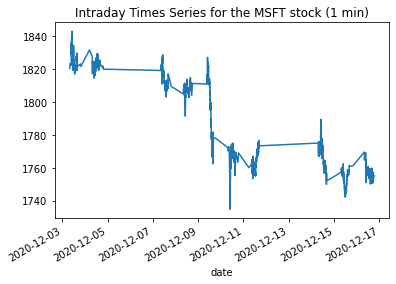

In [20]:
data['4. close'].plot()
plt.title('Intraday Times Series for the MSFT stock (1 min)')
plt.show()

### Technical indicators

#### Important Technical indicators

* SMA: Simple Moving Average                  - ti.get_sma(symbol='GOOGL', interval='60min', time_period=60)
* EMA: Exponential moving average             - ti.get_ema(symbol='GOOGL', interval='60min', time_period=60)
* VWAP: Weighted Average Price                - ti.get_vwap(symbol='GOOGL', interval='60min')
* MACD:Moving Average Convergence/Div      - ti.get_macd(symbol='GOOGL', interval='60min', time_period=60, series_type='close')
* STOCH: Stochastic oscillator                - ti.get_stoch(symbol='GOOGL', interval='60min')
* RSI: Relative Strength index             - ti.get_rsi(symbol='GOOGL', interval='60min', time_period=60, series_type='close')
* ADX: Average Directional Movement        - ti.get_adx(symbol='GOOGL', interval='60min', time_period=60)
* CCI: Commodity Channel Index             - ti.get_cci(symbol='GOOGL', interval='60min', time_period=60)
* Aroon: Aroon                             - ti.get_aroon(symbol='GOOGL', interval='60min', time_period=60, eries_type='close')
* BBANDS: Bollinger bands                  - ti.get_bbands(symbol='GOOGL', interval='60min', time_period=60)
* AD: Chaikin A/D line values              - ti.get_ad(symbol='GOOGL', interval='daily')
* OBV: On Balance Volume                   - ti.get_obv(symbol='GOOGL', interval='daily')

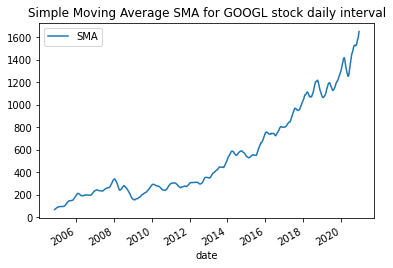

In [36]:
ti = TechIndicators(key=API_KEY, output_format='pandas')
#data_ti, meta_data = ti.get_bbands(symbol='GOOGL', interval='60min', time_period=60)
data_ti, meta_data = ti.get_sma(symbol='GOOGL', interval='daily', time_period=60)
data_ti.plot()
plt.title('Simple Moving Average SMA for GOOGL stock daily interval')
plt.show()

### Sector performance

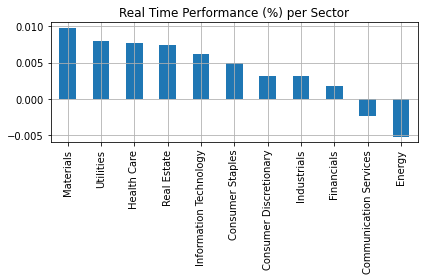

In [27]:
from alpha_vantage.sectorperformance import SectorPerformances

sp = SectorPerformances(key=API_KEY, output_format='pandas')
data, meta_data = sp.get_sector()
data['Rank A: Real-Time Performance'].plot(kind='bar')
plt.title('Real Time Performance (%) per Sector')
plt.tight_layout()
plt.grid()
plt.show()